[View in Colaboratory](https://colab.research.google.com/github/vedavikas06/FaceClassification/blob/master/vggTrain1100.ipynb)

In [1]:
#@title Default title text
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout
import matplotlib.pyplot as plt
from keras.applications import VGG16

train_data_dir = 'dataNew/training'

validation_data_dir = 'dataNew/validation'

train_samples = 4312

validation_samples = 801

epoch = 10

img_width, img_height = 100, 100

# ** Model Begins **
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(100, 100, 3))

conv_base.trainable = True

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        layer.trainable = True
    if layer.name == 'block4_conv1':
        layer.trainable = True    
    else:
        layer.trainable = False

conv_base.summary()


Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool

In [2]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))


model.summary()
# ** Model Ends **

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


fid = drive.ListFile({'q':"title='dataNew.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('dataNew.zip')


from google.colab import files
files.os.listdir()

import zipfile
with zipfile.ZipFile("dataNew.zip","r") as zip_ref:
    zip_ref.extractall()
    
files.os.listdir()    


train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(
        rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        #color_mode = 'grayscale',
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        #color_mode = 'grayscale',
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(
        train_generator,
        samples_per_epoch=train_samples,
        nb_epoch=epoch,
        validation_data=validation_generator,
        nb_val_samples=validation_samples,
        )

model.save_weights('vggweights1000.h5')
model.save('savedvgg1000l.h5')

test_generator = test_datagen.flow_from_directory(
        'dataNew/testing',
        target_size=(100, 100),
        batch_size=1,
        class_mode = None,  # only data, no labels
        shuffle = False)  # keep data in same order as labels

# test_loss,test_acc = model.evaluate_generator(test_generator,steps = 1)
# print('test accuracy :',test_acc)
# print('test loss :',test_loss)
probabilities = model.predict_generator(test_generator, 400)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
y_true = np.array([0] * 100 + [1] * 100 + [2] * 100 + [3] * 100 )
#y_pred = probabilities > 0.5
print(probabilities)
y_pred = np.asarray(probabilities)
y_pred = np.argmax(probabilities,axis=1)

print(y_pred)

print(y_true)

#print(np.shape(probabilities))
print(confusion_matrix(y_true, y_pred))

print(accuracy_score(y_true, y_pred))


Found 4312 images belonging to 4 classes.
Found 801 images belonging to 4 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=134, epochs=10, validation_steps=801)`


Epoch 1/10
134/134 [==============================] - 88s 657ms/step - loss: 0.8968 - acc: 0.5822 - val_loss: 0.6912 - val_acc: 0.6852
Epoch 2/10
134/134 [==============================] - 85s 638ms/step - loss: 0.6452 - acc: 0.7091 - val_loss: 0.7169 - val_acc: 0.6880
Epoch 3/10
134/134 [==============================] - 85s 638ms/step - loss: 0.5505 - acc: 0.7605 - val_loss: 0.5866 - val_acc: 0.7568
Epoch 4/10
 18/134 [===>..........................] - ETA: 14s - loss: 0.5603 - acc: 0.7569

134/134 [==============================] - 85s 637ms/step - loss: 0.5122 - acc: 0.7785 - val_loss: 0.6076 - val_acc: 0.7404
Epoch 5/10
134/134 [==============================] - 86s 640ms/step - loss: 0.4342 - acc: 0.8179 - val_loss: 0.5110 - val_acc: 0.7967
Epoch 6/10
134/134 [==============================] - 86s 639ms/step - loss: 0.4104 - acc: 0.8300 - val_loss: 0.6102 - val_acc: 0.7791
Epoch 7/10
 30/134 [=====>........................] - ETA: 13s - loss: 0.3563 - acc: 0.8500

134/134 [==============================] - 86s 640ms/step - loss: 0.3626 - acc: 0.8479 - val_loss: 0.4754 - val_acc: 0.8041
Epoch 8/10
134/134 [==============================] - 86s 640ms/step - loss: 0.3510 - acc: 0.8595 - val_loss: 0.4759 - val_acc: 0.8216
Epoch 9/10
134/134 [==============================] - 86s 641ms/step - loss: 0.3206 - acc: 0.8682 - val_loss: 0.6765 - val_acc: 0.7502
Epoch 10/10
 32/134 [======>.......................] - ETA: 13s - loss: 0.3087 - acc: 0.8799

134/134 [==============================] - 86s 639ms/step - loss: 0.3072 - acc: 0.8738 - val_loss: 0.5116 - val_acc: 0.8102
Found 400 images belonging to 4 classes.
[[2.66252637e-01 4.52255877e-03 1.13422575e-04 7.29111314e-01]
 [1.08144209e-01 1.20739341e-01 4.08767955e-04 7.70707726e-01]
 [8.30618560e-01 1.77691036e-04 3.99837245e-06 1.69199705e-01]
 ...
 [2.82408111e-02 5.54675236e-03 2.83697523e-06 9.66209531e-01]
 [9.00822431e-02 1.22709051e-01 1.43072859e-04 7.87065566e-01]
 [6.76887453e-01 3.44825611e-02 2.97588273e-03 2.85654098e-01]]
[3 3 0 1 0 0 0 3 3 0 3 0 0 3 3 0 0 3 0 0 0 0 3 3 0 3 1 0 3 0 1 0 3 0 3 0 1
 0 0 0 0 3 3 0 3 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 1 1 3 3 0 3 1 1
 1 1 0 1 3 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 3 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 3 1 3 1 1 1 3 1 3 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


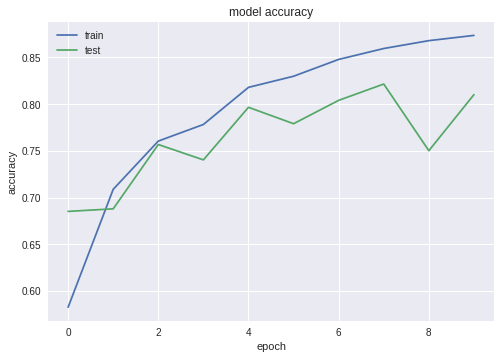

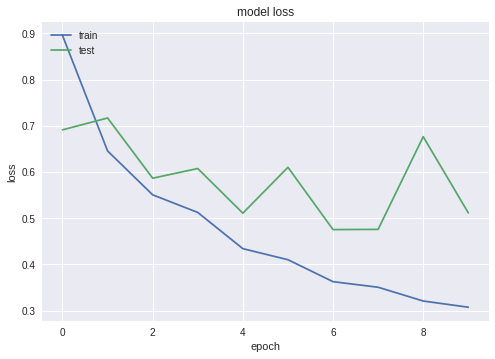

In [3]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()